In [ ]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
dataset = pd.read_csv(url)
df = pd.DataFrame(dataset)
df

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]

Tengo 891 filas y 12 colummnas, voy a utilizar la columna Survived como mi target (y)

Primero hago un preprocesamiento de los datos

In [ ]:
# Observo cuantos datos no numericos (NaN) tengo en el DataFrame
print('Valores NaN de DataFrame')
print(pd.isnull(df).sum())

Valores NaN de DataFrame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Cambio los valores NaN de la columna Age por la edad promedio 

In [ ]:
age_prom = np.round(np.mean(df['Age'])) #Edad promedio redondeada

#Reemplazo los valores NaN por el valor promedio

df['Age'].replace(np.nan, age_prom, inplace = True)

#Verifico cuando valores NaN me queda en el DataFrame
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Tengo muchos valores NaN en la columna Cabin \
Esta columna solo me indica la cabina del pasajero por tal motivo voy a eliminar esta columna

In [ ]:
df.drop('Cabin', axis = 1, inplace = True)

En la columna Embarked tengo dos valores NaN, entonces en este caso voy a eliminar esas filas del DataFrame

In [ ]:
df.dropna(axis = 0, how = 'any', inplace = True)
#Verifico que no tenga otro valor NaN en el DataFrame
print(pd.isnull(df).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Ahora voy a eliminar las columnas Name y Ticket porque no son relevantes para la predicción

In [ ]:
df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

La columna Sex solo contiene valores binario de female y male, estos valores los voy a cambiar por 0 y 1, respectivamente.

In [ ]:
df.replace(['female', 'male'], [0, 1], inplace = True)

Realizo el mismo procedimiento para la columna Embarked

In [ ]:
valores = df['Embarked'].unique() #Los valores son C, S y Q

df['Embarked'].replace(valores, [0,1,2], inplace = True)
# C = 0, S = 1 y Q = 2 

In [ ]:
df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1  22.0      1      0   7.2500         0
1              2         1       1    0  38.0      1      0  71.2833         1
2              3         1       3    0  26.0      0      0   7.9250         0
3              4         1       1    0  35.0      1      0  53.1000         0
4              5         0       3    1  35.0      0      0   8.0500         0
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    1  27.0      0      0  13.0000         0
887          888         1       1    0  19.0      0      0  30.0000         0
888          889         0       3    0  30.0      1      2  23.4500         0
889          890         1       1    1  26.0      0      0  30.0000         1
890          891         0       3    1  32.0      0      0   7.7500         2

[889 rows x 9 columns]

Voy a eliminar la columna PassengerId 

In [ ]:
df.drop('PassengerId', axis = 1, inplace = True)

Ahora voy a normalizar los valores de las columnas para que esten en el intervalo de [0, 1] 

In [ ]:
def normalizar(df):
    return (df - df.min()) / (df.max() - df.min())

df_normal = normalizar(df)   
df_normal 

Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0         0.0     1.0  1.0  0.271174  0.125  0.000000  0.014151       0.0
1         1.0     0.0  0.0  0.472229  0.125  0.000000  0.139136       0.5
2         1.0     1.0  0.0  0.321438  0.000  0.000000  0.015469       0.0
3         1.0     0.0  0.0  0.434531  0.125  0.000000  0.103644       0.0
4         0.0     1.0  1.0  0.434531  0.000  0.000000  0.015713       0.0
..        ...     ...  ...       ...    ...       ...       ...       ...
886       0.0     0.5  1.0  0.334004  0.000  0.000000  0.025374       0.0
887       1.0     0.0  0.0  0.233476  0.000  0.000000  0.058556       0.0
888       0.0     1.0  0.0  0.371701  0.125  0.333333  0.045771       0.0
889       1.0     0.0  1.0  0.321438  0.000  0.000000  0.058556       0.5
890       0.0     1.0  1.0  0.396833  0.000  0.000000  0.015127       1.0

[889 rows x 8 columns]

Ya tengo los datos listo. Ahora defino los valores que seran la entrada de la red neuronal y los valores que espero obtener (salida)

In [ ]:
X = df_normal.drop('Survived', axis = 1) #Entrada
Y = df_normal['Survived']  #Salida

In [ ]:
from sklearn.model_selection import train_test_split

# Tomo 70% de los datos para entrenar la red neuronal y el 30% para validar y probar el modelo
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)


# Tomo el 15% de los datos para validación del modelo y el otro 15% para probar el modelo
X_val, X_test, y_val, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(622, 7)
(622,)
(133, 7)
(133,)
(134, 7)
(134,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense 

model = Sequential([
                    Dense(4, activation = 'relu', input_shape = (7,)),
                    Dense(8, activation = 'relu'),
                    Dense(12, activation = 'relu'),
                    Dense(16, activation = 'sigmoid'),
                    Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size = 32, epochs = 100,
                 validation_data = (X_val, y_val))

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.2407 - accuracy: 0.6141 - val_loss: 0.2282 - val_accuracy: 0.6466
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.6141 - val_loss: 0.2276 - val_accuracy: 0.6466
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.6141 - val_loss: 0.2273 - val_accuracy: 0.6466
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2349 - accuracy: 0.6141 - val_loss: 0.2266 - val_accuracy: 0.6466
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.6141 - val_loss: 0.2236 - val_accuracy: 0.6466
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.2291 - accuracy: 0.6141 - val_loss: 0.2189 - val_accuracy: 0.6466
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.2232 - accuracy: 0.6125 - val_loss: 0.2113 - val_accuracy: 0.6541
Epoch 8/100


In [ ]:
score = model.evaluate(X_test, y_test) #Exactitud del modelo
pred = model.predict(X_test) #Predicciones hechas por la red

y_pred = [] #En esta variable voy a guardar los valores de las predcciones
for i in range(len(pred)): #Este ciclo for cambia los valores menores que 0.5 a 0 y para el caso contrario lo cambia a 1
                            #Porque en mi dataframe inicial tenia estos valores
    if pred[i] > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['y_predict']
y_pred

5/5 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.8284


y_predict
0            0
1            1
2            0
3            0
4            1
..         ...
129          1
130          1
131          0
132          0
133          0

[134 rows x 1 columns]

Se tiene una exactitud de 0.82 con un coste de 0.135

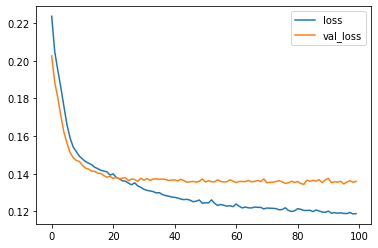

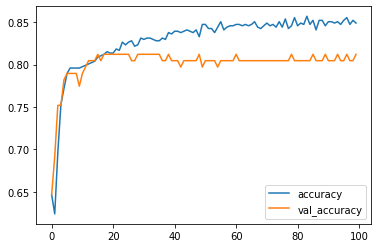

In [ ]:
df_history = pd.DataFrame(hist.history)
df_history.loc[: , ['loss', 'val_loss']].plot()
df_history.loc[: , ['accuracy', 'val_accuracy']].plot()

Las gráficas muestran que en cada época aumenta la exactitud de la red y disminuye la función de coste.